# Read in the datasets and check for the percentage of sequences that meet the criteria

First, we need to join the datasets. 

We'll do this based on the mutation and the reaction.

Next, based on these, we need to check by how much the fitness differs. 

Finally we check whether the amino acid sequence of the parent is correct. 

The main things we need for a predictive model are:

1. mutation
2. reaction string
3. fitness value
4. parent sequence


Comments:

Papers: 
1. Stereospecific Enzymatic Conversion of Boronic Acids to Amines
2. Protoglobin-Catalyzed Formation of cis-Trifluoromethyl-Substituted Cyclopropanes by Carbene Transfer
3. Enzymatic Nitrogen Insertion into Unactivated C-H Bonds
4. 
didn't have any amino_acid_substitutions

Papers: 
1. The Œ≤-subunit of tryptophan synthase is a latent tyrosine synthase
2. 
Were 0 indexed instead of 1 indexed

In [ ]:
! pip install sciutil rdkit scipy matplotlib

In [103]:
import pandas as pd
import warnings
warnings.filterwarnings(action='once')

title = 'Biocatalytic Synthesis of α-Amino Esters via Nitrene C−H Insertion'
llm_df = pd.read_csv(f'data/GoldDataset-DEBASE/{title}/{title}.csv')
llm_df['amino_acid_substitutions'].fillna('#PARENT#', inplace=True)
manual_df = pd.read_excel('data/protein-evolution-database_V4_proteins_reactions_reformatted.xlsx')
# pd.read_csv('data/protein-evolution-database_V4_proteins_reactions_reformatted.csv')
manual_df = manual_df[manual_df['paper_title'] == title]
manual_df

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_93625/2705305635.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  llm_df['amino_acid_substitutions'].fillna('#PARENT#', inplace=True)


id  barcode_plate  \
168  DEDB675              1   
169  DEDB676              1   
170  DEDB677              1   
171  DEDB678              1   
172  DEDB679              1   
..       ...            ...   
260  DEDB767              1   
261  DEDB768              1   
262  DEDB769              1   
263  DEDB770              1   
264  DEDB771              1   

                                                 plate well  \
168  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   A1   
169  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   A2   
170  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   A3   
171  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   A4   
172  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   A5   
..                                                 ...  ...   
260  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   G9   
261  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...  G10   
262  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...  G11   
263  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...  G12   
264  Biocatalytic Synthesis of Œ±‚ÄëAmino Esters vi...   H1   

                              amino_acid_substitutions  alignment_count  \
168                                           #PARENT#              100   
169                                              F157L              100   
170                                         I98T_F157L              100   
171                                   I98T_F157L_F176L              100   
172                             I98T_I138T_F157L_F176L              100   
..                                                 ...              ...   
260  K37E_C46A_F94I_I98V_H137N_I138T_F157L_K160E_F176L              100   
261  K37E_C46A_F94M_I98V_H137N_I138T_F157L_K160E_F176L              100   
262  K37E_C46A_F94F_I98V_H137N_I138T_F157L_K160E_F176L              100   
263  K37E_C46A_F94V_I98V_H137N_I138T_F157L_K160E_F176L              100   
264  K37E_C46A_F94W_I98V_H137N_I138T_F157L_K160E_F176L              100   

     alignment_probability  average_mutation_frequency  p_value  p_adj_value  \
168                      1                           1     0.01         0.01   
169                      1                           1     0.01         0.01   
170                      1                           1     0.01         0.01   
171                      1                           1     0.01         0.01   
172                      1                           1     0.01         0.01   
..                     ...                         ...      ...          ...   
260                      1                           1     0.01         0.01   
261                      1                           1     0.01         0.01   
262                      1                           1     0.01         0.01   
263                      1                           1     0.01         0.01   
264                      1                           1     0.01         0.01   

                                           nt_sequence  \
168  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
169  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
170  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
171  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
172  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
..                                                 ...   
260  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
261  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
262  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
263  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   
264  ATGACTCCCTCGGACATCCCGGGATATGATTATGGGCGTGTCGAGA...   

                                           aa_sequence  \
168  MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACD...   
169  MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACD...   
170  MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACD...   
171  MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACD...   
172  MTPSDIPGYDYGRVEKSPITDLEFDL

In [104]:
pd.read_csv(f'data/GoldDataset-DEBASE/{title}/{title}.csv')['amino_acid_substitutions']

0                                                   NaN
1                                                  W62G
2                                             W62G_L86G
3                                                   NaN
4                                                 F156L
                            ...                        
77    K36E_C45A_W62G_L86G_F93A_I97V_H136N_I137T_F156...
78    K36E_C45A_W62G_L86G_F93A_I97V_H136N_I137T_F156...
79    K36E_C45A_F73W_R90A_I97V_H136N_I137T_F156L_K15...
80    K36E_C45A_F73W_I97V_H136N_I137T_F156L_K159E_F175L
81    K36E_C45A_F73W_I97V_H136N_I137T_F156L_K159E_F175L
Name: amino_acid_substitutions, Length: 82, dtype: object

# Reformat/get reaction string in the same order

Given the reaction can be the same just formatted differently e.g. substrates in different ways, we first match the reaction string between the two datasets

In [105]:
from tqdm import tqdm 
from rdkit import Chem, DataStructs
from rdkit.Chem import rdChemReactions


def reaction_tanimoto_similarity(rxn_smarts1, rxn_smarts2):
    # Used only to verify our target reactions - otherwise we do rxnfp distance.
    # Convert SMARTS strings to ChemicalReaction objects
    rxn1 = rdChemReactions.ReactionFromSmarts(rxn_smarts1)
    rxn2 = rdChemReactions.ReactionFromSmarts(rxn_smarts2)

    if rxn1 is None or rxn2 is None:
        raise ValueError("One or both reaction SMARTS are invalid.")

    # Generate structural fingerprints for reactions\
    fp_params = rdChemReactions.ReactionFingerprintParams()

    # Note: different results with a known bug if you do or don't pass the fp_params... 
    fp1 = rdChemReactions.CreateStructuralFingerprintForReaction(rxn1, ReactionFingerPrintParams=fp_params)
    fp2 = rdChemReactions.CreateStructuralFingerprintForReaction(rxn2, ReactionFingerPrintParams=fp_params)

    # Compute similarity
    return DataStructs.TanimotoSimilarity(fp1, fp2)

# Get the most similar reaction for each one

closest_dists = []
closest_rxns = []
closest_ids = []
for name, reaction_of_interest in llm_df[['id', 'smiles_reaction']].values:
    dists = []
    for gold_id, reaction in manual_df[['id', 'smiles_reaction']].values:
        dists.append(reaction_tanimoto_similarity(reaction_of_interest, reaction))
    manual_df['dists'] = dists
    df_sorted = manual_df.sort_values(by='dists', ascending=False)
    closest_ids.append(df_sorted['id'].values[0])
    closest_rxns.append(df_sorted['smiles_reaction'].values[0])
    closest_dists.append(df_sorted['dists'].values[0])
llm_df[f'closest_dists_tanimoto'] = closest_dists
llm_df[f'closest_rxns_tanimoto'] = closest_rxns
llm_df[f'closest_ids_tanimoto'] = closest_ids
llm_df

id  barcode_plate    plate well  \
0   ᴅ-ApPgb-αEsA-G0 (5308)              1  Plate_1  A01   
1   ᴅ-ApPgb-αEsA-G1 (5309)              1  Plate_1  A02   
2   ᴅ-ApPgb-αEsA-G2 (5310)              1  Plate_1  A03   
3   ʟ-ApPgb-αEsA-G0 (5295)              1  Plate_1  A04   
4   ʟ-ApPgb-αEsA-G1 (5296)              1  Plate_1  A05   
..                     ...            ...      ...  ...   
77         D-ApPgb-aEsA-G2              1  Plate_1  G06   
78         D-ApPgb-aEsA-G2              1  Plate_1  G07   
79      L-ApPgb-aEsA-G10-3              1  Plate_1  G08   
80         L-ApPgb-aEsA-G9              1  Plate_1  G09   
81         L-ApPgb-aEsA-G9              1  Plate_1  G10   

                   smiles_string  \
0    CCOC(=O)[C@H](N)c1ccc(F)cc1   
1    CCOC(=O)[C@H](N)c1ccc(F)cc1   
2    CCOC(=O)[C@H](N)c1ccc(F)cc1   
3   CCOC(=O)[C@@H](N)c1ccc(F)cc1   
4   CCOC(=O)[C@@H](N)c1ccc(F)cc1   
..                           ...   
77            CCCCCCC(N)C(=O)OCC   
78         COC(=O)C(N)c1ccccc1Cl   
79      CCOC(=O)C(N)c1ccc(OC)cc1   
80       CCOC(=O)C(N)c1cccc(C)c1   
81   CCOC(=O)C(N)c1ccc2c(c1)OCO2   

                                      smiles_reaction  alignment_count  \
0   FC1=CC=C(C=C1)CC(=O)OCC.OS(=O)(=O)C(F)(F)F.C(C...                1   
1   FC1=CC=C(C=C1)CC(=O)OCC.OS(=O)(=O)C(F)(F)F.C(C...                1   
2   FC1=CC=C(C=C1)CC(=O)OCC.OS(=O)(=O)C(F)(F)F.C(C...                1   
3   FC1=CC=C(C=C1)CC(=O)OCC.OS(=O)(=O)C(F)(F)F.C(C...                1   
4   FC1=CC=C(C=C1)CC(=O)OCC.OS(=O)(=O)C(F)(F)F.C(C...                1   
..                                                ...              ...   
77                              >> NC(C(=O)OCC)CCCCCC                1   
78                      >> NC(C(=O)OC)C1=C(C=CC=C1)Cl                1   
79                     >> NC(C(=O)OCC)C1=CC=C(C=C1)OC                1   
80                      >> NC(C(=O)OCC)C1=CC(=CC=C1)C                1   
81                  >> NC(C(=O)OCC)C1=CC2=C(OCO2)C=C1                1   

    alignment_probability                                nucleotide_mutation  \
0                     1.0                                                NaN   
1                     1.0                                        T184G_G186T   
2                     1.0                            T184G_G186T_C256G_T257G   
3                     1.0                                                NaN   
4                     1.0                                              T466C   
..                    ...                                                ...   
77                    1.0  A106G_T133G_G134C_T184G_G186T_C256G_T257G_T277...   
78                    1.0  A106G_T133G_G134C_T184G_G186T_C256G_T257G_T277...   
79                    1.0  A106G_T133G_G134C_T218G_T219G_C268G_G269C_A289...   
80                    1.0  A106G_T133G_G134C_T218G_T219G_A289G_C406A_T410...   
81                    1.0  A106G_T133G_G134C_T218G_T219G_A289G_C406A_T410...   

                             amino_acid_substitutions  ... cofactor  \
0                                            #PARENT#  ...      NaN   
1                                                W62G  ...      NaN   
2                                           W62G_L86G  ...      NaN   
3                                            #PARENT#  ...      NaN   
4                                               F156L  ...      NaN   
..                                                ...  ...      ...   
77  K36E_C45A_W62G_L86G_F93A_I97V_H136N_I137T_F156...  ...      NaN   
78  K36E_C45A_W62G_L86G_F93A_I97V_H136N_I137T_F156...  ...      NaN   
79  K36E_C45A_F73W_R90A_I97V_H136N_I137T_F156L_K15...  ...      NaN   
80  K36E_C45A_F73W_I97V_H136N_I137T_F156L_K159E_F175L  ...      NaN   
81  K36E_C45A_F73W_I97V_H136N_I137T_F156L_K159E_F175L  ...      NaN   

                                   reaction_condition  ee  \
0   reaction_temperature:RT;reaction_ph:7.5;reacti... NaN   
1   reaction_temperature:RT;reaction_ph:7.5;reacti... NaN

# Do the same for the sequences

In [117]:
closest_dists = []
closest_seqs = []
closest_ids = []
for name, seq_of_interest in llm_df[['id', 'aa_sequence']].values:
    dists = []
    for gold_id, seq in manual_df[['id', 'aa_sequence']].values:
        dists.append(get_hamming(seq_of_interest, seq))
    manual_df['dists'] = dists
    df_sorted = manual_df.sort_values(by='dists', ascending=True)
    closest_ids.append(df_sorted['id'].values[0])
    closest_seqs.append(df_sorted['aa_sequence'].values[0])
    closest_dists.append(df_sorted['dists'].values[0])
llm_df[f'closest_dists_hamming'] = closest_dists
llm_df[f'closest_seqs_hamming'] = closest_seqs
llm_df[f'closest_ids_hamming'] = closest_ids
llm_df

--------------------------------------------------------------------------------
     Hamming distance:	9	E36K_A45C_A93F_V97I_N136H_T137I_L156F_E159K_L175F	     
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
        Hamming distance:	8	E36K_A45C_A93F_V97I_N136H_T137I_E159K_L175F	        
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
        Hamming distance:	8	E36K_A45C_A93F_V97T_N136H_T137I_E159K_L175F	        
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
           Hamming distance:	7	E36K_A45C_A93F_V97T_N136H_T137I_E159K	           
----------------------------------

id  \
mut_rxn                                                                      
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G0 (5308)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G1 (5309)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G2 (5310)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ʟ-ApPgb-αEsA-G0 (5295)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ʟ-ApPgb-αEsA-G1 (5296)   
...                                                                    ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...         D-ApPgb-aEsA-G2   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...         D-ApPgb-aEsA-G2   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...      L-ApPgb-aEsA-G10-3   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...         L-ApPgb-aEsA-G9   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...         L-ApPgb-aEsA-G9   

                                                    barcode_plate    plate  \
mut_rxn                                                                      
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
...                                                           ...      ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...              1  Plate_1   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...              1  Plate_1   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...              1  Plate_1   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...              1  Plate_1   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...              1  Plate_1   

                                                   well  \
mut_rxn                                                   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A01   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A02   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A03   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A04   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A05   
...                                                 ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...  G06   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...  G07   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...  G08   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...  G09   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...  G10   

                                                                   smiles_string  \
mut_rxn                                                                            
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  CCOC(=O)[C@@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  CCOC(=O)[C@@H](N)c1ccc(F)cc1   
...                                                                          ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...            CCCCCCC(N)C(=O)OCC   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...         COC(=O)C(N)c1ccccc1Cl   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...      CCOC(=O)C(N)c1ccc(OC)cc1   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...       CCOC(=O)C(N)c1cccc(C)c1   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...   CCOC(=O)C(N)c1ccc2c(c1)OCO2   

                                                                                      smiles_reaction  \
mut_rxn                                                                     

In [118]:
import re

# Since it is 0 indexed convert to 1 index
# Function to extract the number, increment it, and return new mutation
def increment_and_sort_key(mut):
    try:
        num = int(mut[1:-1])
        return num
    # should be parent otherwise
    except:
        return 0
    return 0
            
# Also re-order them 
def order_increment_mutations(mutations, increment_value=1):
    # Could also decrement
    # Split into individual mutations
    mutations = mutations.split("_")
    
    # Sort by the number in the mutation
    mutations_sorted = sorted(mutations, key=increment_and_sort_key)
    
    # Increment the number in each mutation
    incremented = [
        re.sub(r'(\D)(\d+)(\D)', lambda m: f"{m.group(1)}{int(m.group(2))+increment_value}{m.group(3)}", mut)
        for mut in mutations_sorted
    ]
    # Recombine into a string
    result = "_".join(incremented)
    return result

if llm_df['aa_sequence'].values[1][int(llm_df['amino_acid_substitutions'].values[1][1:-1]) - 1] == llm_df['amino_acid_substitutions'].values[1][-1]:
    print('zero_indexed')
    llm_df['amino_acid_substitutions'] = [order_increment_mutations(a) for a in llm_df['amino_acid_substitutions'].values]


# Next combine based on the aa_substiution and the reaction


In [119]:
# Tried also with the hamming distance to the sequence but that didn't work
llm_df['mut_rxn'] = [f'{rxn}-{mut}' for rxn, mut in llm_df[['closest_rxns_tanimoto', 'amino_acid_substitutions']].values]
manual_df['mut_rxn'] = [f'{rxn}-{mut}' for rxn, mut in manual_df[['smiles_reaction', 'amino_acid_substitutions']].values]
manual_df.set_index('mut_rxn', inplace=True)
llm_df.set_index('mut_rxn', inplace=True)
df = llm_df.join(manual_df, how='outer', rsuffix='_man', lsuffix='_llm')
df

id_llm  \
mut_rxn                                                                      
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                     NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                     NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                     NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G0 (5308)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ʟ-ApPgb-αEsA-G0 (5295)   
...                                                                    ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                     NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                     NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...        L-ApPgb-aEsA-G11   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...         D-ApPgb-aEsA-G2   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                    5310   

                                                    barcode_plate_llm  \
mut_rxn                                                                 
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                1.0   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                1.0   
...                                                               ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                1.0   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                1.0   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                1.0   

                                                   plate_llm well_llm  \
mut_rxn                                                                 
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...       NaN      NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...       NaN      NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...       NaN      NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   Plate_1      A01   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   Plate_1      A04   
...                                                      ...      ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...       NaN      NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...       NaN      NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...   Plate_1      E09   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...   Plate_1      G06   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...   Plate_1      C12   

                                                               smiles_string_llm  \
mut_rxn                                                                            
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                           NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                           NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...                           NaN   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  CCOC(=O)[C@@H](N)c1ccc(F)cc1   
...                                                                          ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                           NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                           NaN   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...            CCCCCCC(N)C(=O)OCC   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...            CCCCCCC(N)C(=O)OCC   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...                CCOC(=O)C(N)CC   

                                                            

In [120]:
len(manual_df)

97

# Record statistics per dataset

1. parent correct (or hamming distance to parent) --> keeping in mind some may be truncated...

Then for substitutions and reactions:

TN = can't really extract  
FP = ones that are extracted that shouldn't be there (any that weren't recorded)  
FN = ones that were missed  
TP = correctly extracted rows  

Finally we also want the mean distance to the fitness:

1. R^2 value (pearson's correlation)
2. rmsd value



In [121]:
# Check the parent is correct 
from sciutil import SciUtil

u = SciUtil()

def get_hamming(parent, variant):
    # Since the same we can do hamming distance
    hamming_dist = 0
    variant_changes = []
    # Just calculate it over the minimum could be truncated or have a his tag etc
    for i in range(0, min(len(parent), len(variant))):
        if parent[i] != variant[i]:
            variant_changes.append(f'{parent[i]}{i+1}{variant[i]}')
            hamming_dist += 1
    u.dp([f'Hamming distance:', hamming_dist, '_'.join(variant_changes)])
    
    missing = None
    if len(variant) < len(parent):
        missing = parent[len(variant):]
        print('variant < parent', len(variant), len(parent))
        
    elif len(variant) > len(parent):
        missing = variant[len(parent):]
        print('variant > parent', len(variant), len(parent))
    return variant_changes, hamming_dist, missing
    
parent_df = df[df['amino_acid_substitutions_man'] == '#PARENT#']
parent_seq_llm, parent_seq_man = parent_df[['aa_sequence_llm', 'aa_sequence_man']].values[0]
parent_seq_llm.replace('LEHHHHHH', ''), parent_seq_man.replace('LEHHHHHH', '') # Since some of them have the his tag or not we remove this
get_hamming(parent_seq_llm, parent_seq_man)

--------------------------------------------------------------------------------
     Hamming distance:	9	E36K_A45C_A93F_V97I_N136H_T137I_L156F_E159K_L175F	     
--------------------------------------------------------------------------------
variant < parent 195 204


(['E36K', 'A45C', 'A93F', 'V97I', 'N136H', 'T137I', 'L156F', 'E159K', 'L175F'],
 9,
 'LEHHHHHH*')

In [122]:
parent_seq_man

'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAGIYPITATIKPFLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDW'

In [114]:
parent_seq_llm

'MTPSDIPGYDYGRVEKSPITDLEFDLLKKTVMLGEKDVMYLKKACDVLKDQVDEILDLAGGWVASNEHLIYYFSNPDTGEPIKEYLERVRARFGAWILDTTCRDYNREWLDYQYEVGLRHHRSKKGVTDGVRTVPHIPLRYLIAGIYPITATIKPLLAKKGGSPEDIEGMYNAWFKSVVLQVAIWSHPYTKENDWLEHHHHHH*'

# Get the precision and recall

In [123]:
halucinated = len(df[df['id_man'].isna()]) # ones that were gotten that shouldn't have been there 
missed = len(df[df['id_llm'].isna()]) # ones that were missed  
correct = len(df.dropna(subset=['id_man', 'id_llm']))
recall = correct/(correct + missed)
precision = correct/(correct + halucinated)

halucinated, missed, correct, recall, precision

(48, 64, 36, 0.36, 0.42857142857142855)

In [126]:
df.to_csv('test_output.csv')

# Lastly get the rmsd and pearson's correlation

In [100]:
import numpy as np
from scipy import stats

correct_df = df.dropna(subset=['id_man', 'id_llm'])
correct_df = correct_df.fillna(0)
# Check the fitness for each of these
rmsd = [np.sqrt((x_man - x_llm)**2) for x_man, x_llm in correct_df[['fitness_value_man', 'fitness_value_llm']].values]
# Calculate the mean difference as a percent of the mean
mean = np.mean(df['fitness_value_man'].values)
percent_mean_diff = np.mean(rmsd)/mean
rho, pvalue = stats.pearsonr(correct_df['fitness_value_man'].values, correct_df['fitness_value_llm'].values)
rho, pvalue

(np.float64(0.8405561105209701), np.float64(1.4191465017169148e-10))

# Test also the sequences that were recovered rather than the variants


In [102]:

closest_dists = []
closest_seqs = []
closest_ids = []
for name, seq_of_interest in llm_df[['id', 'aa_sequence']].values:
    dists = []
    for gold_id, seq in manual_df[['id', 'aa_sequence']].values:
        dists.append(get_hamming(seq_of_interest, seq))
    manual_df['dists'] = dists
    df_sorted = manual_df.sort_values(by='dists', ascending=False)
    closest_ids.append(df_sorted['id'].values[0])
    closest_seqs.append(df_sorted['aa_sequence'].values[0])
    closest_dists.append(df_sorted['dists'].values[0])
llm_df[f'closest_dists_hamming'] = closest_dists
llm_df[f'closest_seqs_hamming'] = closest_seqs
llm_df[f'closest_ids_hamming'] = closest_ids
llm_df

--------------------------------------------------------------------------------
     Hamming distance:	9	E36K_A45C_A93F_V97I_N136H_T137I_L156F_E159K_L175F	     
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
        Hamming distance:	8	E36K_A45C_A93F_V97I_N136H_T137I_E159K_L175F	        
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
        Hamming distance:	8	E36K_A45C_A93F_V97T_N136H_T137I_E159K_L175F	        
--------------------------------------------------------------------------------
variant < parent 195 204
--------------------------------------------------------------------------------
           Hamming distance:	7	E36K_A45C_A93F_V97T_N136H_T137I_E159K	           
----------------------------------

id  \
mut_rxn                                                                      
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G0 (5308)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G1 (5309)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ᴅ-ApPgb-αEsA-G2 (5310)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ʟ-ApPgb-αEsA-G0 (5295)   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  ʟ-ApPgb-αEsA-G1 (5296)   
...                                                                    ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...         D-ApPgb-aEsA-G2   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...         D-ApPgb-aEsA-G2   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...      L-ApPgb-aEsA-G10-3   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...         L-ApPgb-aEsA-G9   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...         L-ApPgb-aEsA-G9   

                                                    barcode_plate    plate  \
mut_rxn                                                                      
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...              1  Plate_1   
...                                                           ...      ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...              1  Plate_1   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...              1  Plate_1   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...              1  Plate_1   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...              1  Plate_1   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...              1  Plate_1   

                                                   well  \
mut_rxn                                                   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A01   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A02   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A03   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A04   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  A05   
...                                                 ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...  G06   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...  G07   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...  G08   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...  G09   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...  G10   

                                                                   smiles_string  \
mut_rxn                                                                            
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...   CCOC(=O)[C@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  CCOC(=O)[C@@H](N)c1ccc(F)cc1   
FC1=CC=C(CC(OCC)=O)C=C1.[NH3+]OC(C(C)(C)C)=O.O=...  CCOC(=O)[C@@H](N)c1ccc(F)cc1   
...                                                                          ...   
O=C(OCC)CC1CCCCC1.[NH3+]OC(C(C)(C)C)=O.O=S(C(F)...            CCCCCCC(N)C(=O)OCC   
O=C(OC)CC1=CC=CC=C1.[NH3+]OC(C(C)(C)C)=O.O=S(C(...         COC(=O)C(N)c1ccccc1Cl   
O=C(OCC)CC1=CC=C(OC)C=C1.[NH3+]OC(C(C)(C)C)=O.O...      CCOC(=O)C(N)c1ccc(OC)cc1   
O=C(OCC)CC1=CC(Br)=CC=C1.[NH3+]OC(C(C)(C)C)=O.O...       CCOC(=O)C(N)c1cccc(C)c1   
O=C(OCC)CC1=CC2=C(OCO2)C=C1.[NH3+]OC(C(C)(C)C)=...   CCOC(=O)C(N)c1ccc2c(c1)OCO2   

                                                                                      smiles_reaction  \
mut_rxn                                                                     

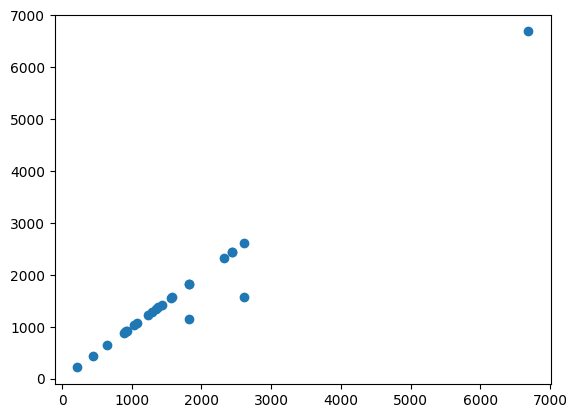

In [102]:
import matplotlib.pyplot as plt

plt.scatter(df['fitness_value_man'].values, df['fitness_value_llm'].values)


In [70]:
llm_df['aa_sequence'].values[0]

'MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLSSQRLIKEACDESRFDKNLSQALKFMRDFLGDGLATSWTHEKNWKKAHNILLPSFSQQAMKGYHAMMVDIAVQLVQKWERLNADEHIEVSEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFIISMVRALDEVMNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKARGEQSDDLLTQMLNGKDPETGEPLDDGNIRYQIITFLMAGHEPTSGLLSFALYFLVKNPHVLQKVAEEAARVLVDPVPSYKQVKQLKYVGMVLNEALRLWPTVPAFSLYAKEDTVLGGEYPLEKGDEVMVLIPQLHRDKTVWGDDVEEFRPERFENPSAIPQHAFKPFGNGQRASIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETGSLKPKGFVVKAKSKKIPLGGIPSPSTEQSAKKVRKKAENAHNTPLLVLYGSNMGTAEGTARDLADIAMSKGFAPQVATLDSHAGNLPREGAVLIVTASYNGHPPDNAKQFVDWLDQASADEVKGVRYSVFGCGDKNWATTYQKVPAFIDETLAAKGAENIADRGEADASDDFEGTYEEWREHMWSDVAAYFNLDIENSEDNKSTLSLQFVDSAADMPLAKMHGAFSTNVVASKELQQPGSARSTRHLEIELPKEASYQEGDHLGVIPRNYEGIVNRVTARFGLDASQQIRLEAEEEKLAHLPLAKTVSVEELLQYVELQDPVTRTQLRAMAAKTVCPPHKVELEALLEKQAYKEQVLAKRLTMLELLEKYPACEMKFSEFIALLPSIRPRYYSISSSPRVDEKQASITVSVVSGEAWSGYGEYKGIASNYLAELQEGDTITCFISTPQSEFTLPKDPETPLIMVGPGTGVAPFRGFVQARKQLKEQGQSLGEAHLYFGCRSPHEDYLYQEELENAQSEGIITLHTAFSRMPNQPKTYVQHVMEQDGKKLIELLDQGAHFYI

In [71]:
df['aa_sequence'].values[0]

'MTIKEMPQPKTFGELKNLPLLNTDKPVQALMKIADELGEIFKFEAPGRVTRYLSSQRLIKEACDESRFDKNLSQALKFMRDFLGDGLATSWTHEKNWKKAHNILLPSFSQQAMKGYHAMMVDIAVQLVQKWERLNADEHIEVSEDMTRLTLDTIGLCGFNYRFNSFYRDQPHPFIISMVRALDEVMNKLQRANPDDPAYDENKRQFQEDIKVMNDLVDKIIADRKARGEQSDDLLTQMLNGKDPETGEPLDDGNIRYQIITFLMAGHEPTSGLLSFALYFLVKNPHVLQKVAEEAARVLVDPVPSYKQVKQLKYVGMVLNEALRLWPTVPAFSLYAKEDTVLGGEYPLEKGDEVMVLIPQLHRDKTVWGDDVEEFRPERFENPSAIPQHAFKPFGNGQRASIGQQFALHEATLVLGMMLKHFDFEDHTNYELDIKETGSLKPKGFVVKAKSKKIPLGGIPSPSTEQ'

# END of analysis


In [73]:
# Check for the overlap of the aa's

aas = set(df['aa_sequence'].values) & set(llm_df['aa_sequence'].values) 
len(aas)

0

In [74]:
df['smiles_reaction'].values

array(['CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>C[C@@H](N)C#CC2=CC=CC=C2',
       'CCCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>N[C@H](CC)C#CC2=CC=CC=C2',
       'CCCCC#CC1=CC=CC=C1.NOC(C(C)(C)C)=O.O=S(C(F)(F)F)(O)=O>>N[C@H](CCC)C#CC2=CC=CC=C2',
       'CCC#CC1=C(F)C=CC=C1.

In [75]:
# Check for the overlap of the aa's

aas = set(df['smiles_reaction'].values) & set(llm_df['smiles_reaction'].values) 
len(aas)

0

# Look at tanimoto similarity between the reactions

In [76]:
llm_df

id  barcode_plate    plate well         smiles_string  \
0   PA-G0              1  Plate_1  A01      CC(N)C#Cc1ccccc1   
1   PA-G1              1  Plate_1  A02      CC(N)C#Cc1ccccc1   
2   PA-G2              1  Plate_1  A03      CC(N)C#Cc1ccccc1   
3   PA-G3              1  Plate_1  A04      CC(N)C#Cc1ccccc1   
4   PA-G4              1  Plate_1  A05      CC(N)C#Cc1ccccc1   
5   PA-G5              1  Plate_1  A06      CC(N)C#Cc1ccccc1   
6   PA-G6              1  Plate_1  A07      CC(N)C#Cc1ccccc1   
7   PA-G7              1  Plate_1  A08      CC(N)C#Cc1ccccc1   
8   PA-G8              1  Plate_1  A09      CC(N)C#Cc1ccccc1   
9   PA-G8              1  Plate_1  A10      CC(N)C#Cc1ccccc1   
10  PA-G8              1  Plate_1  A11     CCC(N)C#Cc1ccccc1   
11  PA-G8              1  Plate_1  A12    CCCC(N)C#Cc1ccccc1   
12  PA-G8              1  Plate_1  B01     CC(N)C#Cc1ccccc1F   
13  PA-G8              1  Plate_1  B02  COc1cccc(C#CC(C)N)c1   
14  PA-G8              1  Plate_1  B03   Cc1cccc(C#CC(C)N)c1   
15  PA-G8              1  Plate_1  B04   Cc1ccc(C#CC(C)N)cc1   
16  PA-G8              1  Plate_1  B05  COc1ccc(C#CC(C)N)cc1   
17  PA-G8              1  Plate_1  B06   CC(N)C#Cc1ccc(F)cc1   
18  PA-G8              1  Plate_1  B07      CC(N)C#Cc1ccccn1   
19  PA-G8              1  Plate_1  B08       CC(N)C#Cc1cccs1   
20  PA-G8              1  Plate_1  B09       CC(N)C#Cc1ccsc1   
21  PA-G8              1  Plate_1  B10         NCC#Cc1ccccc1   
22  PA-G8              1  Plate_1  B11   CC(C)(N)C#Cc1ccccc1   
23  PA-G8              1  Plate_1  B12      CC(N)C#Cc1ccccc1   
24  PA-G8              1  Plate_1  C01     CC(N)C#Cc1ccccc1F   

                                      smiles_reaction  alignment_count  \
0   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
1   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
2   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
3   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
4   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
5   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
6   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
7   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
8   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
9         C1(=CC=CC=C1)C#CCC >> C1(=CC=CC=C1)C#CC(C)N                1   
10      C1(=CC=CC=C1)C#CCCC >> C1(=CC=CC=C1)C#CC(CC)N                1   
11    C1(=CC=CC=C1)C#CCCCC >> C1(=CC=CC=C1)C#CC(CCC)N                1   
12    C(#CCC)C1=C(C=CC=C1)F >> FC1=C(C=CC=C1)C#CC(C)N                1   
13  C(#CCC)C1=CC(=CC=C1)OC >> COC=1C=C(C=CC1)C#CC(C)N                1   
14    C(#CCC)C1=CC(=CC=C1)C >> CC=1C=C(C=CC1)C#CC(C)N                1   
15    C(#CCC)C1=CC=C(C=C1)C >> CC1=CC=C(C=C1)C#CC(C)N                1   
16  C(#CCC)C1=CC=C(C=C1)OC >> COC1=CC=C(C=C1)C#CC(C)N                1   
17    C(#CCC)C1=CC=C(C=C1)F >> FC1=CC=C(C=C1)C#CC(C)N                1   
18        C(#CCC)C1=NC=CC=C1 >> N1=C(C=CC=C1)C#CC(C)N                1   
19            C(#CCC)C=1SC=CC1 >> S1C(=CC=C1)C#CC(C)N                1   
20            C(#CCC)C1=CSC=C1 >> S1C=C(C=C1)C#CC(C)N                1   
21                              >> C1(=CC=CC=C1)C#CCN                1   
22                          >> CC(C)(C#CC1=CC=CC=C1)N                1   
23        C1(=CC=CC=C1)C#CCC >> C1(=CC=CC=C1)C#CC(C)N                1   
24    C(#CCC)C1=C(C=CC=C1)F >> FC1=C(C=CC=C1)C#CC(C)N                1   

    alignment_probability                                nucleotide_mutation  \
0                     1.0                                                NaN   
1                     1.0                                              A804T   
2                     1.0                                A804T_A1186T_A1187G   
3                     1.0           A804T_A1186T_A1187G_G1312C_G1313A_T1314A   
4                

In [77]:
! pip install rdkit

/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_85381/3726506967.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dists'] = dists
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_85381/3726506967.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dists'] = dists
/var/folders/sj/4wqsfdtd6093v9746b0t3mq40000gn/T/ipykernel_85381/3726506967.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

id  barcode_plate    plate well         smiles_string  \
0   PA-G0              1  Plate_1  A01      CC(N)C#Cc1ccccc1   
1   PA-G1              1  Plate_1  A02      CC(N)C#Cc1ccccc1   
2   PA-G2              1  Plate_1  A03      CC(N)C#Cc1ccccc1   
3   PA-G3              1  Plate_1  A04      CC(N)C#Cc1ccccc1   
4   PA-G4              1  Plate_1  A05      CC(N)C#Cc1ccccc1   
5   PA-G5              1  Plate_1  A06      CC(N)C#Cc1ccccc1   
6   PA-G6              1  Plate_1  A07      CC(N)C#Cc1ccccc1   
7   PA-G7              1  Plate_1  A08      CC(N)C#Cc1ccccc1   
8   PA-G8              1  Plate_1  A09      CC(N)C#Cc1ccccc1   
9   PA-G8              1  Plate_1  A10      CC(N)C#Cc1ccccc1   
10  PA-G8              1  Plate_1  A11     CCC(N)C#Cc1ccccc1   
11  PA-G8              1  Plate_1  A12    CCCC(N)C#Cc1ccccc1   
12  PA-G8              1  Plate_1  B01     CC(N)C#Cc1ccccc1F   
13  PA-G8              1  Plate_1  B02  COc1cccc(C#CC(C)N)c1   
14  PA-G8              1  Plate_1  B03   Cc1cccc(C#CC(C)N)c1   
15  PA-G8              1  Plate_1  B04   Cc1ccc(C#CC(C)N)cc1   
16  PA-G8              1  Plate_1  B05  COc1ccc(C#CC(C)N)cc1   
17  PA-G8              1  Plate_1  B06   CC(N)C#Cc1ccc(F)cc1   
18  PA-G8              1  Plate_1  B07      CC(N)C#Cc1ccccn1   
19  PA-G8              1  Plate_1  B08       CC(N)C#Cc1cccs1   
20  PA-G8              1  Plate_1  B09       CC(N)C#Cc1ccsc1   
21  PA-G8              1  Plate_1  B10         NCC#Cc1ccccc1   
22  PA-G8              1  Plate_1  B11   CC(C)(N)C#Cc1ccccc1   
23  PA-G8              1  Plate_1  B12      CC(N)C#Cc1ccccc1   
24  PA-G8              1  Plate_1  C01     CC(N)C#Cc1ccccc1F   

                                      smiles_reaction  alignment_count  \
0   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
1   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
2   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
3   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
4   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
5   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
6   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
7   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
8   C1(=CC=CC=C1)C#CCC.OS(=O)(=O)C(F)(F)F.C(C(C)(C...                1   
9         C1(=CC=CC=C1)C#CCC >> C1(=CC=CC=C1)C#CC(C)N                1   
10      C1(=CC=CC=C1)C#CCCC >> C1(=CC=CC=C1)C#CC(CC)N                1   
11    C1(=CC=CC=C1)C#CCCCC >> C1(=CC=CC=C1)C#CC(CCC)N                1   
12    C(#CCC)C1=C(C=CC=C1)F >> FC1=C(C=CC=C1)C#CC(C)N                1   
13  C(#CCC)C1=CC(=CC=C1)OC >> COC=1C=C(C=CC1)C#CC(C)N                1   
14    C(#CCC)C1=CC(=CC=C1)C >> CC=1C=C(C=CC1)C#CC(C)N                1   
15    C(#CCC)C1=CC=C(C=C1)C >> CC1=CC=C(C=C1)C#CC(C)N                1   
16  C(#CCC)C1=CC=C(C=C1)OC >> COC1=CC=C(C=C1)C#CC(C)N                1   
17    C(#CCC)C1=CC=C(C=C1)F >> FC1=CC=C(C=C1)C#CC(C)N                1   
18        C(#CCC)C1=NC=CC=C1 >> N1=C(C=CC=C1)C#CC(C)N                1   
19            C(#CCC)C=1SC=CC1 >> S1C(=CC=C1)C#CC(C)N                1   
20            C(#CCC)C1=CSC=C1 >> S1C=C(C=C1)C#CC(C)N                1   
21                              >> C1(=CC=CC=C1)C#CCN                1   
22                          >> CC(C)(C#CC1=CC=CC=C1)N                1   
23        C1(=CC=CC=C1)C#CCC >> C1(=CC=CC=C1)C#CC(C)N                1   
24    C(#CCC)C1=C(C=CC=C1)F >> FC1=C(C=CC=C1)C#CC(C)N                1   

    alignment_probability                                nucleotide_mutation  \
0                     1.0                                                NaN   
1                     1.0                                              A804T   
2                     1.0                                A804T_A1186T_A1187G   
3                     1.0           A804T_A1186T_A1187G_G1312C_G1313A_T1314A   
4                

In [79]:
# Check for the overlap of the aa's

aas = set(df['amino_acid_substitutions'].values) & set(llm_df['amino_acid_substitutions'].values) 
len(aas)

9

In [80]:
llm_df['amino_acid_substitutions'].values

array(['#PARENT#', 'E268D', 'E268D_N396C', 'E268D_N396C_G438Q',
       'S73T_E268D_N396C_G438Q', 'S73T_E268D_N396C_G438Q_S439G',
       'S73T_E268D_T270V_N396C_G438Q_S439G',
       'S73T_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q

In [81]:
# Also BLAST to check for the similarity between 
df['amino_acid_substitutions'].values

array(['#PARENT#', 'E268D', 'E268D_N396C', 'E268D_N396C_G438Q',
       'S73T_E268D_N396C_G438Q', 'S73T_E268D_N396C_G438Q_S439G',
       'S73T_E268D_T270V_N396C_G438Q_S439G',
       'S73T_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q_S439G',
       'S73T_A75K_H267S_E268D_T270V_N396C_G438Q